# Wascally Wabbits
http://rosalind.info/problems/fib/

In [32]:
# Compile and run the benchmarks
!make
!make test

make: `wabbits' is up to date.
./WABBITS 5 1
                    5
   3.00002284E-05
./wabbits.jl 5 1 r
5
  0.044804 seconds (17.50 k allocations: 980.430 KB)
./wabbits.jl 5 1 m
5
  0.046607 seconds (17.89 k allocations: 1004.182 KB)
./wabbits.jl 5 1 l
5
  0.429933 seconds (753.52 k allocations: 35.080 MB, 5.28% gc time)
./wabbits.jl 5 1 c
5.000000000000001
  0.065679 seconds (43.13 k allocations: 2.155 MB)
./WABBITS 10 1
                   55
   1.99999195E-05
./wabbits.jl 10 1 r
55
  0.043105 seconds (17.50 k allocations: 980.430 KB)
./wabbits.jl 10 1 m
55
  0.042617 seconds (17.89 k allocations: 1004.182 KB)
./wabbits.jl 10 1 l
55
  0.465453 seconds (753.53 k allocations: 35.081 MB, 4.88% gc time)
./wabbits.jl 10 1 c
55.000000000000014
  0.068881 seconds (43.13 k allocations: 2.155 MB)
./WABBITS 20 1
                 6765
   2.09999271E-05
./wabbits.jl 20 1 r
6765
  0.041984 seconds (17.50 k allocations: 980.461 KB)
./wabbits.jl 20 1 m
6765
  0.054458 seconds (17.89 k allocations: 1

In [137]:
# Collect the results
from itertools import izip_longest

def grouper(iterable, n, fillvalue=None):
    "Split into groups"
    args = [iter(iterable)] * n
    return izip_longest(*args, fillvalue=fillvalue)

with open("benchmarks.txt",'r') as f:
    x,y=[],[]
    for b in grouper(f,3):
        x.append(b[0].strip())
        y.append(float(b[2].strip().split()[0]))

fs = ['FORTRAN', 'Julia-Recursive','Julia-Memo','Julia-Matrix','Julia-ClosedForm']
bs = ['5','10','20','40','50']
benchmarks = {fs[i]: [y[j] for j in range(i,21+i,5)] for i in range(5)}

print benchmarks

{'Julia-Memo': [0.038158, 0.037874, 0.056729, 0.037556, 0.043339], 'FORTRAN': [1.89999118e-05, 1.40001066e-05, 4.99999151e-05, 1.40001066e-05, 1.69998966e-05], 'Julia-Matrix': [0.41424, 0.389842, 0.384769, 0.398695, 0.452335], 'Julia-ClosedForm': [0.077153, 0.058227, 0.059327, 0.058297, 0.067941], 'Julia-Recursive': [0.037646, 0.037118, 0.038461, 0.912575, 111.298705]}


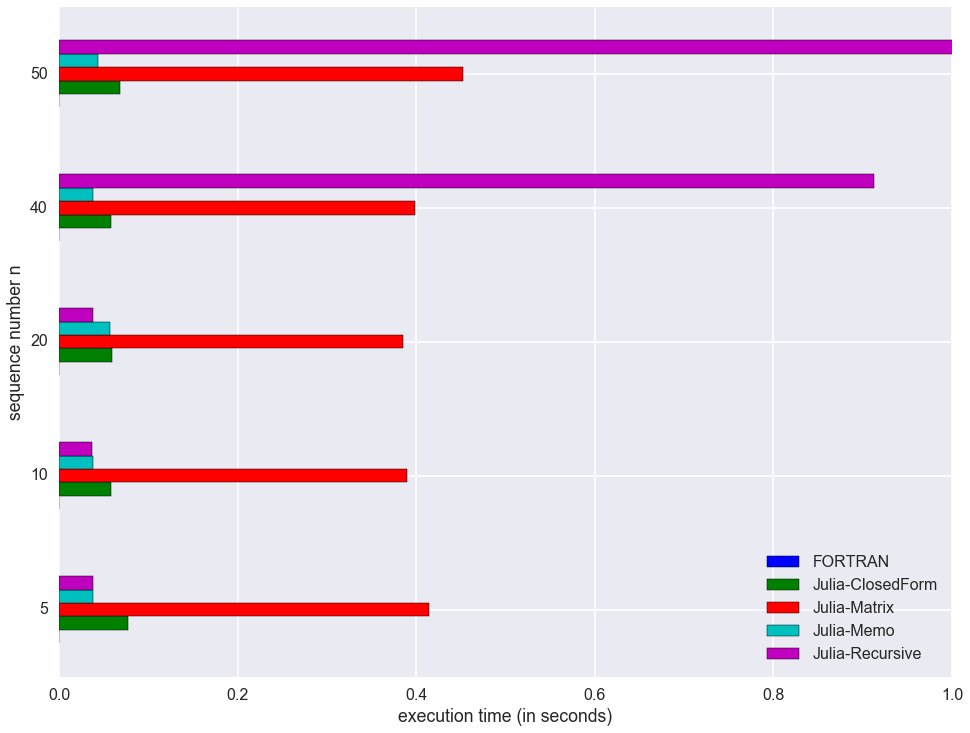

In [154]:
# Make a plot of the benchmark results
import pandas as pd
bench = pd.DataFrame(benchmarks,index=bs)
# Create a figure of given size
fig = plt.figure(figsize=(16,12))
# Add a subplot
ax = fig.add_subplot(111)
ax.set_ylabel('sequence number n')
ax.set_xlabel('execution time (in seconds)')
bench.plot(kind='barh', logx=False, ax=ax, xlim=(0,1))

In [179]:
fig.savefig('wabbit_bench.png', bbox_inches='tight', dpi=300)

## Fun fact: 

If we begin with 1 pair and in each generation, every pair of reproduction-age rabbits produces a litter of 3 rabbit pairs ...

In [171]:
!./wabbits.jl 240.0 3 c

2.4177901657921938e86
  0.087529 seconds (42.89 k allocations: 2.170 MB)


... within 20 years the number of rabbits will have surpassed the number of atoms in the observable universe [1](https://en.wikipedia.org/wiki/Observable_universe#Matter_content_.E2.80.94_number_of_atoms) ...

In [176]:
!./wabbits.jl 360.0 3 c

7.138611516052661e129
  0.074664 seconds (42.89 k allocations: 2.170 MB)


... and within 30 years the number will be approaching the game-tree complexity of chess [2][1].

[1]: https://en.wikipedia.org/wiki/Shannon_number